In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

%matplotlib inline
pd.set_option('display.max_columns', 32)
sns.set_style('whitegrid')


In [2]:
import kagglehub


path = kagglehub.dataset_download("raj713335/tbo-hotels-dataset")

print("Path to dataset files:", path)

100%|██████████| 395M/395M [00:06<00:00, 62.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/raj713335/tbo-hotels-dataset/versions/1


In [ ]:
import glob
import os

files = glob.glob(os.path.join(path, "**"), recursive=True)
print("Files found:")
for f in files:
    print(f)


Files found:
/root/.cache/kagglehub/datasets/raj713335/tbo-hotels-dataset/versions/1/
/root/.cache/kagglehub/datasets/raj713335/tbo-hotels-dataset/versions/1/hotels.csv


In [3]:
import os
import pandas as pd
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("raj713335/tbo-hotels-dataset")
print("Dataset path:", path)

# The CSV file is named hotels.csv and is directly under the 'versions/1/' folder
csv_file = "hotels.csv"

# Load the data
df = pd.read_csv(os.path.join(path, csv_file), encoding='ISO-8859-1')
df.head()


Dataset path: /root/.cache/kagglehub/datasets/raj713335/tbo-hotels-dataset/versions/1


,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,FourStar,Nr. 7 Brigada Viii Street Tirane,NaN,Hotel de Paris is a charming boutique hotel th...,42268822,Private parking Parking onsite Television in c...,41.32213|19.81665,00355 4226 5009,1000,https://www.booking.com/hotel/al/de-paris.html
1,AL,Albania,106078,Albanien,1003301,Hotel Green,FourStar,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,NaN,"Located in a suburb of Tirana, Hotel Green is ...",35548520058,airport pick up wifi available in all areas Ai...,41.30413|19.74703,+35548520057,1041,https://www.booking.com/hotel/al/hotel-green.html
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,ThreeStar,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,NaN,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",00355 (0)42273689,face masks for guests available all plates cu...,41.3216|19.81199,00355 (0)42273766,1019,https://www.booking.com/hotel/al/theranda.html
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,ThreeStar,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",Skanderbeg Square: within 500 metre,This hotel enjoys an enviable setting in Tiran...,NaN,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052,NaN,1001,http://www.hotelseven-tirana.com/
4,AL,Albania,106078,Albanien,1003325,Viktoria,ThreeStar,Rruga E Elbasanit Km 4 Sauk SaukTirana,NaN,Located in a new residential area at the edge ...,+355695406986,internet services Ironing service Family rooms...,41.29125|19.85349,355 69 5406986,1000,https://www.booking.com/hotel/al/viktoria-sauk...


In [ ]:
df.shape

(1010033, 16)

In [ ]:
df.describe()

,cityCode,HotelCode
count,1.010033e+06,1.010033e+06
mean,1.274184e+05,2.850143e+06
std,1.353500e+04,1.991153e+06
min,1.000010e+05,1.000000e+06
25%,1.159360e+05,1.310642e+06
50%,1.274950e+05,1.641121e+06
75%,1.388070e+05,5.337335e+06
max,1.518080e+05,6.194373e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   countyCode        1009121 non-null  object
 1    countyName       1010033 non-null  object
 2    cityCode         1010033 non-null  int64 
 3    cityName         1010033 non-null  object
 4    HotelCode        1010033 non-null  int64 
 5    HotelName        1010033 non-null  object
 6    HotelRating      1010033 non-null  object
 7    Address          1009931 non-null  object
 8    Attractions      484941 non-null   object
 9    Description      963028 non-null   object
 10   FaxNumber        449686 non-null   object
 11   HotelFacilities  959655 non-null   object
 12   Map              1009103 non-null  object
 13   PhoneNumber      682896 non-null   object
 14   PinCode          979054 non-null   object
 15   HotelWebsiteUrl  759915 non-null   object
dtypes: int64(2), objec

In [ ]:
df.head(10)

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,FourStar,Nr. 7 Brigada Viii Street Tirane,NaN,Hotel de Paris is a charming boutique hotel th...,42268822,Private parking Parking onsite Television in c...,41.32213|19.81665,00355 4226 5009,1000,https://www.booking.com/hotel/al/de-paris.html
1,AL,Albania,106078,Albanien,1003301,Hotel Green,FourStar,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,NaN,"Located in a suburb of Tirana, Hotel Green is ...",35548520058,airport pick up wifi available in all areas Ai...,41.30413|19.74703,+35548520057,1041,https://www.booking.com/hotel/al/hotel-green.html
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,ThreeStar,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,NaN,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",00355 (0)42273689,face masks for guests available all plates cu...,41.3216|19.81199,00355 (0)42273766,1019,https://www.booking.com/hotel/al/theranda.html
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,ThreeStar,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",Skanderbeg Square: within 500 metre,This hotel enjoys an enviable setting in Tiran...,NaN,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052,NaN,1001,http://www.hotelseven-tirana.com/
4,AL,Albania,106078,Albanien,1003325,Viktoria,ThreeStar,Rruga E Elbasanit Km 4 Sauk SaukTirana,NaN,Located in a new residential area at the edge ...,+355695406986,internet services Ironing service Family rooms...,41.29125|19.85349,355 69 5406986,1000,https://www.booking.com/hotel/al/viktoria-sauk...
5,AL,Albania,106078,Albanien,1015185,Bel Conti Hotel,FourStar,Shkembi i Kavajes L13 Durres,NaN,"Just steps away from a private sandy beach, Be...",00355 522 61 245,24-hour security Shuttle service Beach Swimmin...,41.27547|19.51618,(355) 52262245,2001,https://www.booking.com/hotel/al/bel-conti.html
6,AL,Albania,106078,Albanien,1016188,Pik Loti Hotel,ThreeStar,Rruga Petro Nini Luarasi Tirana,NaN,Offering free Wi-Fi and free secured parking i...,+35542235155,linens towels and laundry washed in accordanc...,41.32545|19.82793,(355) 44538491,1010,https://www.booking.com/hotel/al/pik-loti.html
7,AL,Albania,106078,Albanien,1016189,Hotel Parlamenti,ThreeStar,Rruga Jeronim De Rada 75 1001 Tirana,NaN,Hotel Parlamenti is located in the historic ce...,0038118526210,Private parking parking on site Private check-...,41.32737|19.82521,(355) 42265024,1001,https://www.booking.com/hotel/al/parlamenti.html
8,AL,Albania,106078,Albanien,1017483,Victoria,ThreeStar,Dibra Street 331 331 Tirana,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Ministry of Justice</p><p>L...,355-69-4557854,Concierge services Terrace Free self parking L...,41.34106|19.83108,355-69-4557854,1012,http://hotelvictoria.al/en/home-2/
9,AL,Albania,106078,Albanien,1032158,MonarC Hotel,FourStar,Intersection. Rr. George W. Bush Road And Blvd...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Tirana Parliament</p><p>Loc...,355-42-274511,Concierge services ATM/banking Terrace Compute...,41.32547|19.82503,355 4 2274511,1001,http://www.monarc.al/


In [4]:
df.columns = df.columns.str.strip()

In [5]:
# checking for null values


missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_counts / len(df)) * 100
missing_data = pd.concat([missing_counts, missing_percentage], axis=1, keys=['Total Missing', 'Percent'])
print(missing_data)


                 Total Missing    Percent
FaxNumber               560347  55.478088
Attractions             525092  51.987608
PhoneNumber             327137  32.388744
HotelWebsiteUrl         250118  24.763349
HotelFacilities          50378   4.987758
Description              47005   4.653808
PinCode                  30979   3.067128
Map                        930   0.092076
countyCode                 912   0.090294
Address                    102   0.010099
HotelRating                  0   0.000000
HotelName                    0   0.000000
countyName                   0   0.000000
cityCode                     0   0.000000
HotelCode                    0   0.000000
cityName                     0   0.000000


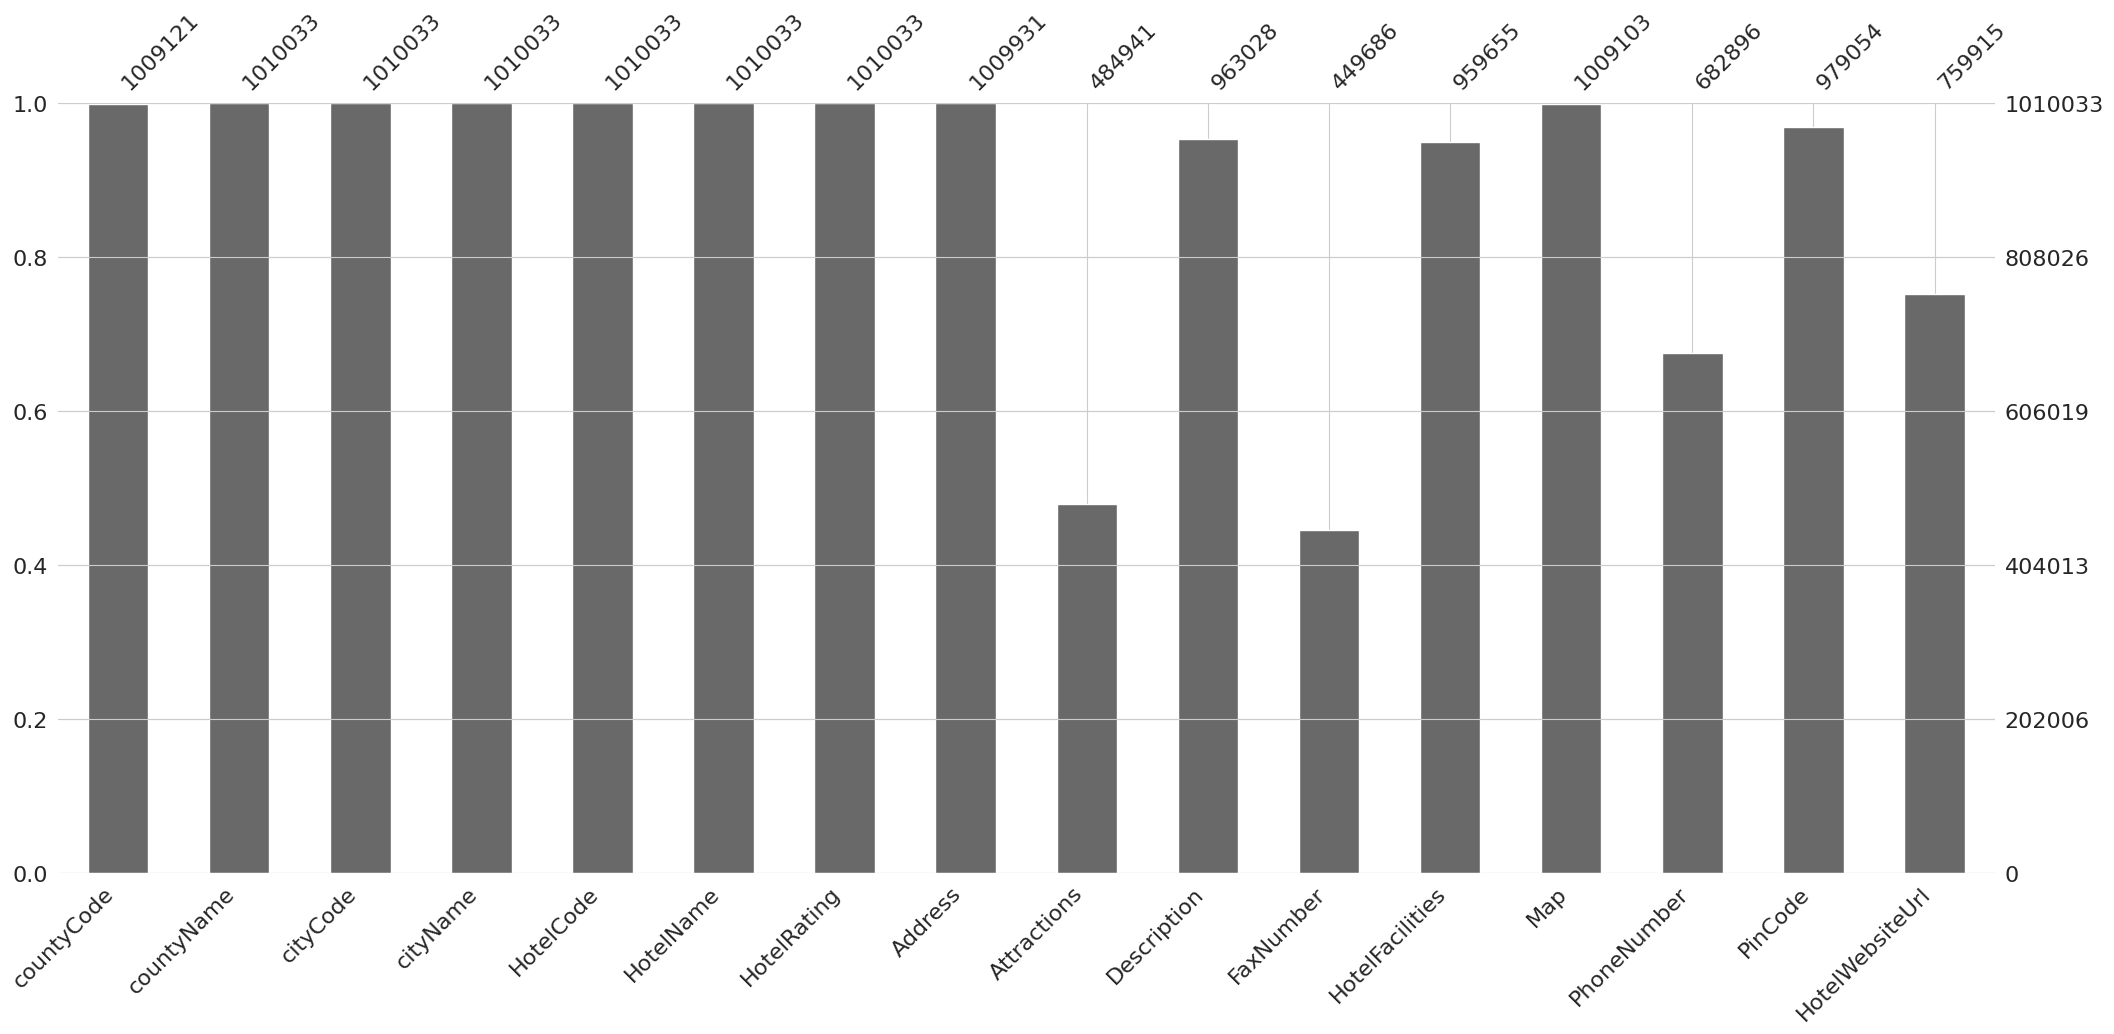

In [6]:
# visualizing null values
msno.bar(df)
plt.show()

In [7]:

columns_to_drop = ["FaxNumber", "Attractions", "PhoneNumber", "HotelWebsiteUrl", "PinCode"]


df.drop(columns=columns_to_drop, axis=1, inplace=True)


df.head()


,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Description,HotelFacilities,Map
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,FourStar,Nr. 7 Brigada Viii Street Tirane,Hotel de Paris is a charming boutique hotel th...,Private parking Parking onsite Television in c...,41.32213|19.81665
1,AL,Albania,106078,Albanien,1003301,Hotel Green,FourStar,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,"Located in a suburb of Tirana, Hotel Green is ...",airport pick up wifi available in all areas Ai...,41.30413|19.74703
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,ThreeStar,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",face masks for guests available all plates cu...,41.3216|19.81199
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,ThreeStar,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",This hotel enjoys an enviable setting in Tiran...,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052
4,AL,Albania,106078,Albanien,1003325,Viktoria,ThreeStar,Rruga E Elbasanit Km 4 Sauk SaukTirana,Located in a new residential area at the edge ...,internet services Ironing service Family rooms...,41.29125|19.85349


In [8]:
df.dropna(subset=['Map'], inplace=True)
# Fill missing values in HotelFacilities
df['HotelFacilities'].fillna("No data", inplace=True)

# Fill missing values in Description
df['Description'].fillna("No description provided", inplace=True)



# Fill missing values in countyCode
df['countyCode'].fillna("Unknown", inplace=True)

# Fill missing values in Address
df['Address'].fillna("No address", inplace=True)


In [9]:

rating_map = {
    'OneStar': 1,
    'TwoStar': 2,
    'ThreeStar': 3,
    'FourStar': 4,
    'FiveStar': 5
}

# Convert the HotelRating column using the map
df['HotelRating'] = df['HotelRating'].map(rating_map)


df.head()



,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Description,HotelFacilities,Map
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,4.0,Nr. 7 Brigada Viii Street Tirane,Hotel de Paris is a charming boutique hotel th...,Private parking Parking onsite Television in c...,41.32213|19.81665
1,AL,Albania,106078,Albanien,1003301,Hotel Green,4.0,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,"Located in a suburb of Tirana, Hotel Green is ...",airport pick up wifi available in all areas Ai...,41.30413|19.74703
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,3.0,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",face masks for guests available all plates cu...,41.3216|19.81199
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,3.0,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",This hotel enjoys an enviable setting in Tiran...,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052
4,AL,Albania,106078,Albanien,1003325,Viktoria,3.0,Rruga E Elbasanit Km 4 Sauk SaukTirana,Located in a new residential area at the edge ...,internet services Ironing service Family rooms...,41.29125|19.85349


In [10]:
print(df['HotelRating'].value_counts(dropna=False))


HotelRating
3.0    352451
NaN    315058
2.0    159708
4.0    130797
1.0     28720
5.0     22369
Name: count, dtype: int64


In [11]:
# Identify rows that didn't match (NaN) or are out of 1-5 range
invalid_ratings = df[df['HotelRating'].isna() | ~df['HotelRating'].between(1, 5)]
print("Number of invalid/missing ratings:", len(invalid_ratings))
invalid_ratings.head()

Number of invalid/missing ratings: 315058


,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Description,HotelFacilities,Map
14,AL,Albania,106078,Albanien,1040291,Hotel Relax,NaN,Rr. Durresit 1001 Tirana,"Set 1.9 km from the centre of Tirana, in a bus...",Private check-in/check-out concierge service S...,41.33724|19.7927
31,AL,Albania,106078,Albanien,1163287,Mai Tai Resort,NaN,Rruga e Elbasanit Lunder km 7Tirana,"Situated in Tirana, 8.1 km from Skanderbeg Squ...",Swimming pool Fire extinguishers CCTV in commo...,41.28541|19.85572
134,AL,Albania,106078,Albanien,1387933,Hotel Imperial IH,NaN,Perroi Zaranika Rruga Kadri Hoxha3001 Elbasan,"Located in Elbasan, 39 km from Skanderbeg Squa...",Fire extinguishers CCTV outside property CCTV ...,41.11372|20.07365
140,AL,Albania,106078,Albanien,1390371,Camping Mali i Robit,NaN,"Mali i Robit, Kavajë 2500 Durrës","Set in Golem, 100 metres from a beach, Hotel M...",Private check-in/check-out linens towels and ...,41.23266|19.51728
141,AL,Albania,106078,Albanien,1396180,Hotel Briker,NaN,Rruga Barrikadave 3/24 1007 Tirana,No description provided,No data,41.33097|19.82052


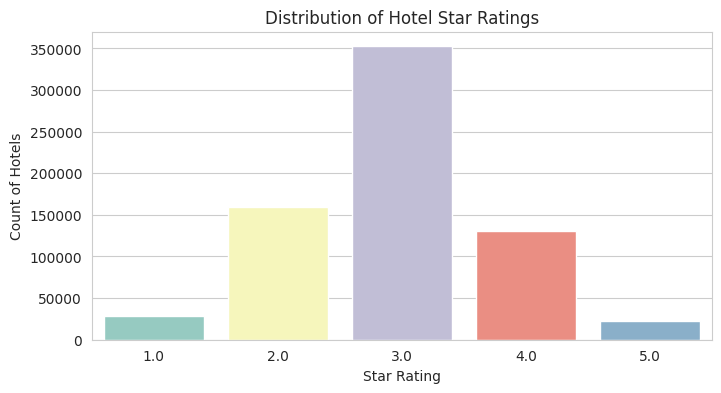

In [12]:
#3.1 Distribution of Star Ratings
plt.figure(figsize=(8,4))
sorted_ratings = sorted(df['HotelRating'].dropna().unique())
sns.countplot(x='HotelRating', data=df, palette='Set3', order=sorted_ratings)
plt.title("Distribution of Hotel Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count of Hotels")
plt.show()


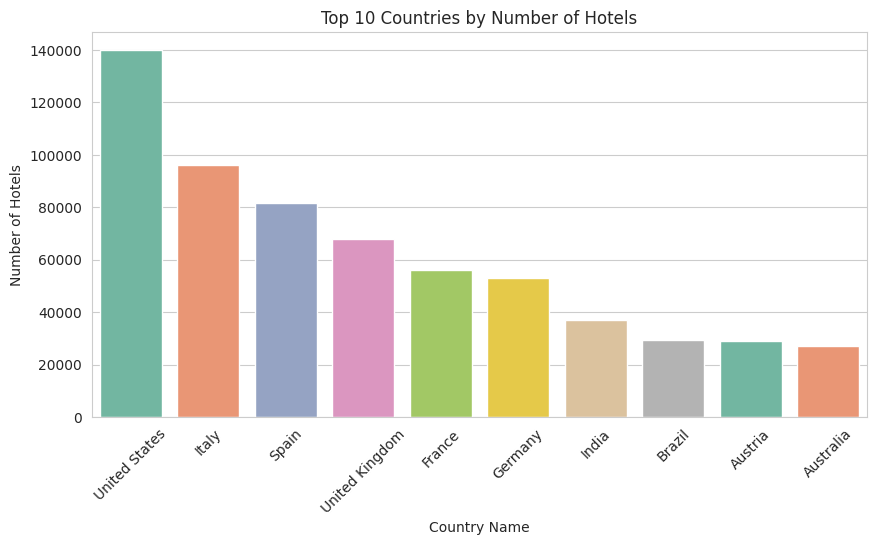

In [13]:
#3.2 Top Countries by Hotel Count
top_countries = df['countyName'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set2')
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Number of Hotels")
plt.xlabel("Country Name")
plt.ylabel("Number of Hotels")
plt.show()

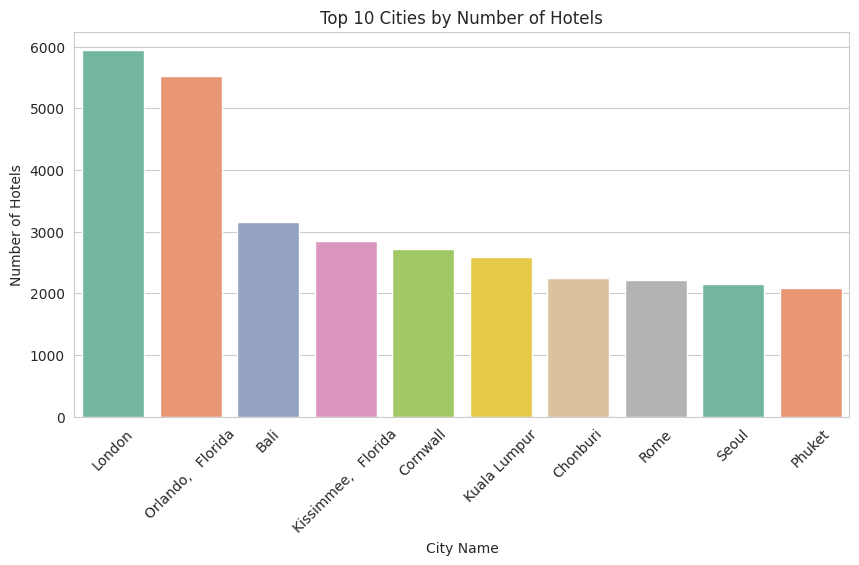

In [ ]:
#3.3 Top Cities by Hotel Count
top_cities = df['cityName'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Set2')
plt.xticks(rotation=45)
plt.title("Top 10 Cities by Number of Hotels")
plt.xlabel("City Name")
plt.ylabel("Number of Hotels")
plt.show()

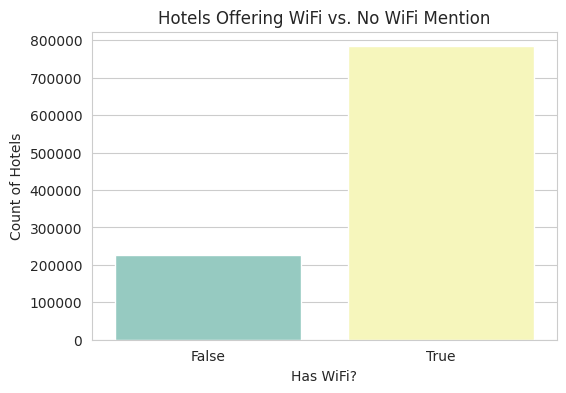

In [ ]:
#4. Analyzing Facilities or Amenities
# Example: Checking how many hotels mention WiFi
df['Has_WiFi'] = df['HotelFacilities'].str.contains("wifi|wi-fi", case=False, na=False)

plt.figure(figsize=(6,4))
sns.countplot(x='Has_WiFi', data=df, palette='Set3')
plt.title("Hotels Offering WiFi vs. No WiFi Mention")
plt.xlabel("Has WiFi?")
plt.ylabel("Count of Hotels")
plt.show()


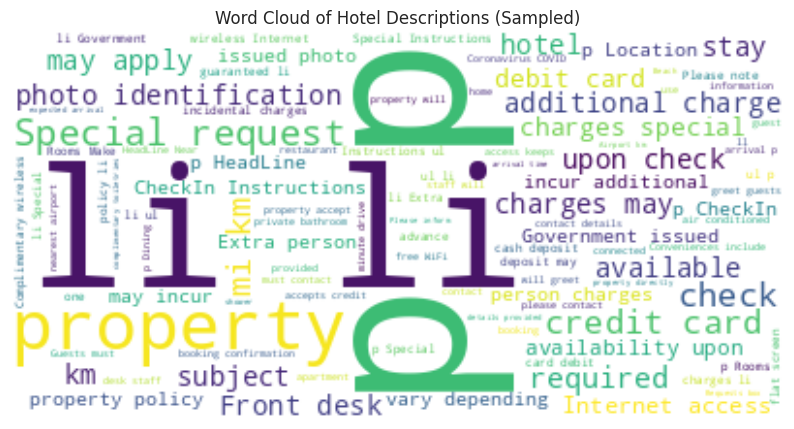

In [14]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Example: sample 10,000 descriptions (or fewer if needed)
sample_size = 10000
df_sample = df['Description'].dropna()
if len(df_sample) > sample_size:
    df_sample = df_sample.sample(sample_size, random_state=42)

# Combine the sampled text
text_data = " ".join(str(desc) for desc in df_sample)

# Generate the word cloud
wordcloud = WordCloud(
    background_color="white",
    max_words=200
).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Hotel Descriptions (Sampled)")
plt.show()



#N-Gram Frequency (requires tokenization libraries, e.g., nltk or spaCy).
#This can help you see the most common phrases (e.g., “swimming pool,” “free breakfast”).

Mapping & Geospatial (Optional)
def parse_lat_lon(map_str):
    if pd.isnull(map_str):
        return np.nan, np.nan
    try:
        lat_str, lon_str = map_str.split(',')
        return float(lat_str.strip()), float(lon_str.strip())
    except:
        return np.nan, np.nan

df['Latitude'], df['Longitude'] = zip(*df['Map'].apply(parse_lat_lon))


plt.figure(figsize=(8,6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5)
plt.title("Geographical Distribution of Hotels")
plt.show()

In [ ]:

# !pip install nltk

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams
import matplotlib.pyplot as plt
import pandas as pd


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df_sample = df['Description'].dropna()
if len(df_sample) > 10000:
    df_sample = df_sample.sample(10000, random_state=42)

In [ ]:
stop_words = set(stopwords.words('english'))

all_tokens = []

for text in df_sample:
    # Remove non-alphanumeric characters (except spaces)
    text_clean = re.sub(r'[^A-Za-z0-9 ]', '', str(text))
    # Convert to lowercase
    text_clean = text_clean.lower()
    # Tokenize
    tokens = word_tokenize(text_clean)
    # Remove stopwords & short tokens
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]

    # Add to master list
    all_tokens.extend(tokens)

print("Total tokens:", len(all_tokens))


Total tokens: 1181967


In [ ]:
# Create a list of all bigrams
bigram_list = list(bigrams(all_tokens))

# Count frequency using FreqDist
bigram_freq = FreqDist(bigram_list)

# Show the top 20 most common bigrams
common_bigrams = bigram_freq.most_common(20)
print("Top 20 Bigrams:")
for bigram, freq in common_bigrams:
    print(bigram, "->", freq)


Top 20 Bigrams:
('special', 'requests') -> 8436
('contact', 'property') -> 7465
('credit', 'card') -> 6653
('upon', 'checkin') -> 5739
('charges', 'may') -> 5715
('subject', 'availability') -> 5680
('additional', 'charges') -> 5637
('photo', 'identification') -> 5611
('requests', 'subject') -> 5598
('identification', 'credit') -> 5220
('may', 'apply') -> 4956
('front', 'desk') -> 4945
('charges', 'special') -> 4601
('availability', 'upon') -> 4393
('internet', 'access') -> 4359
('may', 'incur') -> 4355
('incur', 'additional') -> 4355
('checkin', 'may') -> 4338
('depending', 'property') -> 4334
('vary', 'depending') -> 4332


In [ ]:
# Create a list of all trigrams
trigram_list = list(trigrams(all_tokens))

# Count frequency
trigram_freq = FreqDist(trigram_list)

# Show the top 20 most common trigrams
common_trigrams = trigram_freq.most_common(20)
print("\nTop 20 Trigrams:")
for trigram, freq in common_trigrams:
    print(trigram, "->", freq)



Top 20 Trigrams:
('requests', 'subject', 'availability') -> 5598
('photo', 'identification', 'credit') -> 5220
('identification', 'credit', 'card') -> 5220
('charges', 'special', 'requests') -> 4601
('charges', 'may', 'apply') -> 4491
('subject', 'availability', 'upon') -> 4392
('availability', 'upon', 'checkin') -> 4391
('may', 'incur', 'additional') -> 4354
('incur', 'additional', 'charges') -> 4344
('may', 'apply', 'vary') -> 4330
('apply', 'vary', 'depending') -> 4330
('vary', 'depending', 'property') -> 4330
('upon', 'checkin', 'may') -> 4330
('checkin', 'may', 'incur') -> 4330
('additional', 'charges', 'special') -> 4330
('required', 'checkin', 'incidental') -> 4325
('wireless', 'internet', 'access') -> 4132
('may', 'required', 'checkin') -> 3890
('complimentary', 'wireless', 'internet') -> 3595
('card', 'cash', 'deposit') -> 3584


<Figure size 1000x500 with 0 Axes>

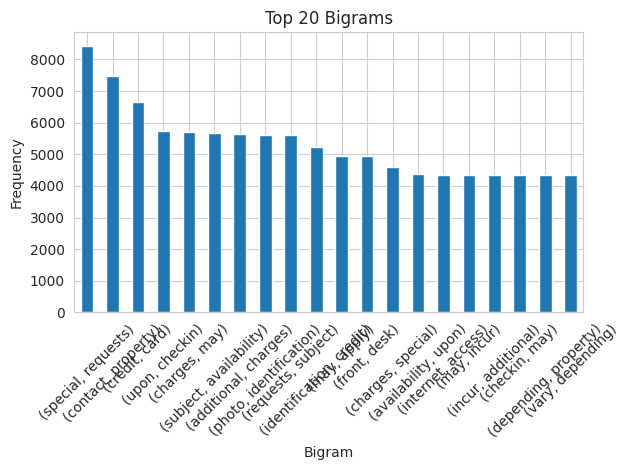

In [ ]:
# Convert to DataFrame for easy plotting
common_bigrams_df = pd.DataFrame(common_bigrams, columns=['bigram', 'freq'])

plt.figure(figsize=(10, 5))
common_bigrams_df.plot.bar(x='bigram', y='freq', rot=45, legend=False)
plt.title("Top 20 Bigrams")
plt.ylabel("Frequency")
plt.xlabel("Bigram")
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

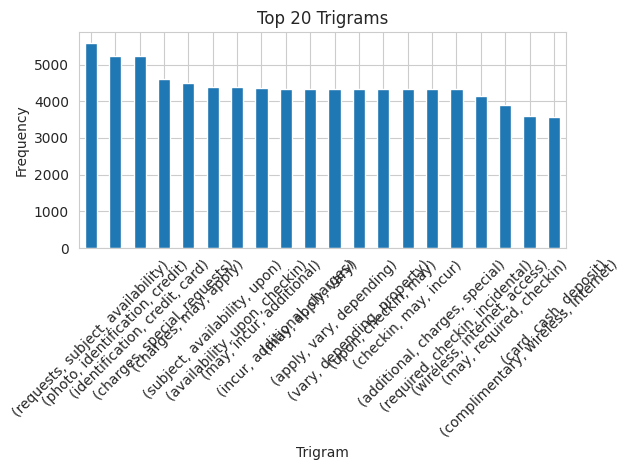

In [ ]:
common_common_trigrams_df = pd.DataFrame(common_trigrams, columns=['trigram', 'freq'])

plt.figure(figsize=(10, 5))
common_common_trigrams_df.plot.bar(x='trigram', y='freq', rot=45, legend=False)
plt.title("Top 20 Trigrams")
plt.ylabel("Frequency")
plt.xlabel("Trigram")
plt.tight_layout()
plt.show()


In [15]:
#SENTIMENT ANALYSIS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [16]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [17]:
# Function to compute compound sentiment score for a given text
def get_sentiment(text):
    # VADER expects a string input; ensure text is string
    return sid.polarity_scores(str(text))['compound']


In [18]:
# Compute sentiment scores for Description and HotelFacilities
df['Description_Sentiment'] = df['Description'].apply(get_sentiment)
df['HotelFacilities_Sentiment'] = df['HotelFacilities'].apply(get_sentiment)

KeyboardInterrupt: 

In [ ]:
df.to_pickle("hotels_with_sentiment.pkl")


In [ ]:
print(df[['HotelName', 'Description', 'Description_Sentiment']].head())
print(df[['HotelName', 'HotelFacilities', 'HotelFacilities_Sentiment']].head())


In [ ]:
# Distribution of sentiment scores for hotel descriptions
plt.figure(figsize=(10, 4))
sns.histplot(df['Description_Sentiment'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Description Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of sentiment scores for hotel facilities
plt.figure(figsize=(10, 4))
sns.histplot(df['HotelFacilities_Sentiment'], bins=20, kde=True, color='salmon')
plt.title("Distribution of Hotel Facilities Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#FASTER PROCESSING
sample_text = df['Description'].iloc[0]
print(sample_text)
print(sid.polarity_scores(sample_text))


In [ ]:
def get_sentiment(text):
    try:
        return sid.polarity_scores(str(text))['compound']
    except Exception as e:
        # Optionally, log the error: print(f"Error processing text: {e}")
        return 0.0  # Or another default value


In [ ]:
from tqdm import tqdm
tqdm.pandas()  # Adds progress bar support to pandas apply

df['Description_Sentiment'] = df['Description'].progress_apply(get_sentiment)
df['HotelFacilities_Sentiment'] = df['HotelFacilities'].progress_apply(get_sentiment)


In [ ]:
sample_df = df.sample(10000, random_state=42)
sample_df['Description_Sentiment'] = sample_df['Description'].progress_apply(get_sentiment)


In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Download resources if needed
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()


# Define sentiment function with error handling
def get_sentiment(text):
    try:
        return sid.polarity_scores(str(text))['compound']
    except Exception as e:
        return 0.0

# Enable progress bar for pandas apply
tqdm.pandas()

# Apply sentiment analysis with progress monitoring
df['Description_Sentiment'] = df['Description'].progress_apply(get_sentiment)
df['HotelFacilities_Sentiment'] = df['HotelFacilities'].progress_apply(get_sentiment)

# Check the results
print(df[['Description_Sentiment', 'HotelFacilities_Sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████| 1009103/1009103 [13:27<00:00, 1249.15it/s]

   Description_Sentiment  HotelFacilities_Sentiment
0                 0.9623                     0.9231
1                 0.8807                     0.5106
2                 0.9393                     0.9022
3                 0.9896                     0.0000
4                 0.9694                     0.8807


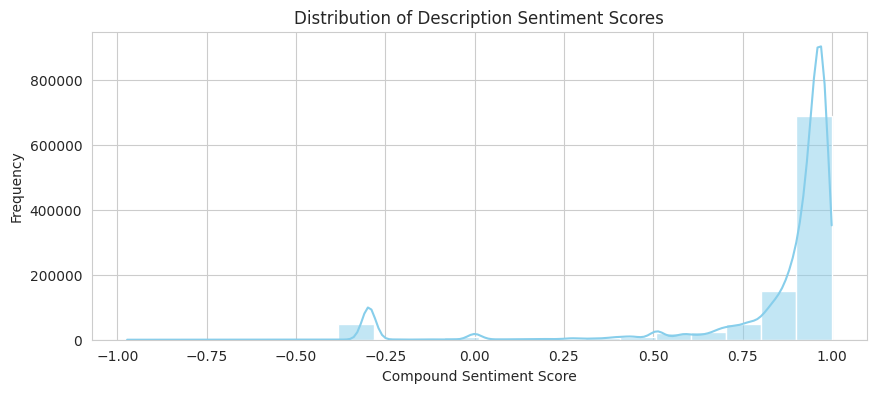

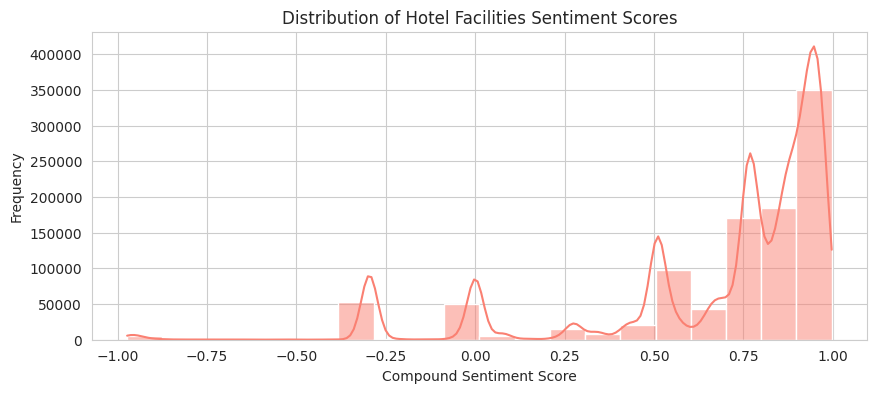

In [20]:
# Distribution of sentiment scores for hotel descriptions
plt.figure(figsize=(10, 4))
sns.histplot(df['Description_Sentiment'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Description Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of sentiment scores for hotel facilities
plt.figure(figsize=(10, 4))
sns.histplot(df['HotelFacilities_Sentiment'], bins=20, kde=True, color='salmon')
plt.title("Distribution of Hotel Facilities Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [21]:
df.to_pickle("hotels_with_sentiment.pkl")

In [22]:
# After computing sentiment scores for all rows:
df.to_csv("hotels_with_sentiment.csv", index=False)
